In [1]:
!pip install kaggle
!pip install tensorflow

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"andriysanchez","key":"8b233a95f7f3f39e917c36afb7faf5c3"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d niteshfre/chessman-image-dataset
!unzip chessman-image-dataset.zip -d chessman_data

Dataset URL: https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset
License(s): other
chessman-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  chessman-image-dataset.zip
replace chessman_data/Chessman-image-dataset/Chess/Bishop/00000000.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: [y]es
error:  invalid response [[y]es]
replace chessman_data/Chessman-image-dataset/Chess/Bishop/00000000.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: [[y]es]
error:  invalid response [[[y]es]]
replace chessman_data/Chessman-image-dataset/Chess/Bishop/00000000.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000000.JPG  
replace chessman_data/Chessman-image-dataset/Chess/Bishop/00000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000001.jpg  
  inflating: chessman_data/Chessman-image-dataset/Chess/Bishop/00000002.JPG

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Ruta donde se encuentran las imágenes descomprimidas
data_dir = "Chessman-image-dataset/Chess"

# Crear datasets de entrenamiento y validación
train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),
    batch_size=32
)

# Normalizar los valores de los píxeles
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 552 files belonging to 6 classes.
Using 442 files for training.
Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(6, activation='softmax')  # Hay 6 clases de piezas de ajedrez
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Entrenar el modelo
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [8]:
loss, accuracy = model.evaluate(validation_dataset)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

4/4 [==============================] - 2s 350ms/step - loss: 3.8079 - accuracy: 0.4000
Loss: 3.807920217514038
Accuracy: 0.4000000059604645


1/1 [==============================] - 0s 180ms/step


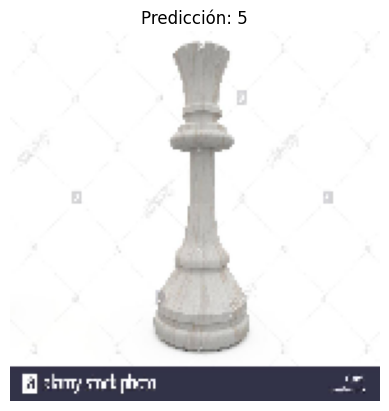

In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Cargar una imagen de prueba
img_path = 'chessman_data/Chessman-image-dataset/Chess/Rook/00000032.jpg'  # Cambia esta ruta a una imagen de prueba
img = image.load_img(img_path,target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Crear un batch de un solo elemento

# Normalizar la imagen
img_array = img_array / 255.0

# Hacer una predicción
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Mostrar la imagen y la predicción
plt.imshow(img)
plt.title(f'Predicción: {predicted_class}')
plt.axis('off')
plt.show()

In [17]:
print (img)

<PIL.Image.Image image mode=RGB size=150x150 at 0x7EE0D0490520>
